In [349]:
# Base tools
import pandas as pd
pd.options.display.max_rows = 500
import numpy as np
import math
import datetime
from datetime import datetime

# Visualization
import matplotlib.pyplot as plt
from matplotlib import cm
cmap = cm.get_cmap('coolwarm') # Colour map
# https://matplotlib.org/stable/users/explain/colors/colormaps.html
%matplotlib inline
import seaborn as sns
sns.set_palette(palette="PuBuGn_d")

# Imports

In [20]:
# Import the datasets
appearances = pd.read_csv('./data/appearances.csv')
club_games = pd.read_csv('./data/club_games.csv')
clubs = pd.read_csv('./data/clubs.csv')
competitions = pd.read_csv('./data/competitions.csv')
game_events = pd.read_csv('./data/game_events.csv')
game_lineups = pd.read_csv('./data/game_lineups.csv')
games = pd.read_csv('./data/games.csv')
player_valuations = pd.read_csv('./data/player_valuations.csv')
players = pd.read_csv('./data/players.csv')
players['date_of_birth'] = pd.to_datetime(players['date_of_birth'], format='%Y-%m-%d')

# List of all files
files = ['appearances', 'club_games', 'clubs', 'competitions', 'game_events', 'game_lineups', 'games', 'player_valuations', 'players']

# Overview

In [69]:
print('Table size: ', appearances.shape)
appearances.head(3)

Table size:  (1485697, 13)


,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45


In [70]:
print('Table size: ', club_games.shape)
club_games.head(3)

Table size:  (128586, 11)


,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,2221751,431,1.0,NaN,Lutz Göttling,60,2.0,NaN,Christian Streich,Home,0
1,2221755,83,3.0,NaN,Ralph Hasenhüttl,4795,0.0,NaN,Tomas Oral,Home,1
2,2222597,3725,2.0,2.0,Stanislav Cherchesov,232,1.0,5.0,Unai Emery,Home,1


In [506]:
print('Table size: ', clubs.shape)
clubs.head(3)

Table size:  (426, 16)


,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,url
0,105,sv-darmstadt-98,SV Darmstadt 98,L1,NaN,29,26.1,11,37.9,1,Merck-Stadion am Böllenfalltor,17500,€-1.60m,NaN,2023,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,Ural Yekaterinburg,RU1,NaN,25,27.6,13,52.0,4,Yekaterinburg Arena,23000,€-770k,NaN,2023,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Besiktas JK,TR1,NaN,32,26.7,16,50.0,14,Beşiktaş Park,42590,€-14.50m,NaN,2023,https://www.transfermarkt.co.uk/besiktas-istan...


In [71]:
print('Table size: ', competitions.shape)
competitions.head(3)

Table size:  (43, 10)


,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url
0,CIT,italy-cup,italy-cup,domestic_cup,domestic_cup,75,Italy,IT1,europa,https://www.transfermarkt.co.uk/italy-cup/star...
1,NLSC,johan-cruijff-schaal,johan-cruijff-schaal,domestic_super_cup,other,122,Netherlands,NL1,europa,https://www.transfermarkt.co.uk/johan-cruijff-...
2,GRP,kypello-elladas,kypello-elladas,domestic_cup,domestic_cup,56,Greece,GR1,europa,https://www.transfermarkt.co.uk/kypello-ellada...


In [72]:
print('Table size: ', game_events.shape)
game_events.head(3)

Table size:  (652010, 10)


,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
0,2f41da30c471492e7d4a984951671677,2012-08-05,2211607,77,Cards,610,4425,"1. Yellow card , Mass confrontation",NaN,NaN
1,a72f7186d132775f234d3e2f7bc0ed5b,2012-08-05,2211607,77,Cards,383,33210,"1. Yellow card , Mass confrontation",NaN,NaN
2,b2d721eaed4692a5c59a92323689ef18,2012-08-05,2211607,3,Goals,383,36500,", Header, 1. Tournament Goal Assist: , Corner,...",NaN,56416.0


In [73]:
print('Table size: ', game_lineups.shape)
game_lineups.head(3)

Table size:  (86822, 9)


,game_lineups_id,game_id,club_id,type,number,player_id,player_name,team_captain,position
0,baa0d6827dab4fab07d8dc1604e720a7,3606208,338,starting_lineup,15,264372,Viktor Tsygankov,0,Right Winger
1,1715ec342bf902522b69322a036a3f29,3606208,338,starting_lineup,71,91931,Denys Boyko,0,Goalkeeper
2,d7c22834cb4c20efeddc527511feabad,3606208,338,starting_lineup,34,505463,Oleksandr Syrota,0,Centre-Back


In [74]:
print('Table size: ', games.shape)
games.head(3)

Table size:  (64293, 23)


,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2.0,1.0,2.0,...,Akhmat-Arena,21700.0,Vladislav Bezborodov,https://www.transfermarkt.co.uk/terek-grozny_s...,NaN,NaN,Akhmat Grozny,Spartak Moscow,2:1,domestic_league
1,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0.0,2.0,11.0,...,Metallurg,11400.0,Sergey Ivanov,https://www.transfermarkt.co.uk/krylya-sovetov...,NaN,NaN,Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league
2,2222658,RU1,2012,10. Matchday,2012-09-30,2410,121,0.0,2.0,2.0,...,Arena Khimki,12000.0,Sergey Karasev,https://www.transfermarkt.co.uk/cska-moscow_di...,NaN,NaN,CSKA Moscow,Dynamo Moscow,0:2,domestic_league


In [75]:
print('Table size: ', player_valuations.shape)
player_valuations.head(3)

Table size:  (440663, 9)


,player_id,last_season,datetime,date,dateweek,market_value_in_eur,n,current_club_id,player_club_domestic_competition_id
0,3132,2013,2003-12-09 00:00:00,2003-12-09,2003-12-08,400000,1,126,TR1
1,6893,2012,2003-12-15 00:00:00,2003-12-15,2003-12-15,900000,1,984,GB1
2,10,2015,2004-10-04 00:00:00,2004-10-04,2004-10-04,7000000,1,398,IT1


In [80]:
# Check for duplicates
print(sum(players.duplicated()))
print(sum(club_games.duplicated()))
print(sum(clubs.duplicated()))
print(sum(competitions.duplicated()))
print(sum(game_events.duplicated()))
print(sum(game_lineups.duplicated()))
print(sum(games.duplicated()))
print(sum(player_valuations.duplicated()))

0
0
0
0
0
0
0
0
0


In [ ]:
# Check leagues

In [ ]:
# Check number of players per country

In [ ]:
# Check number of players per club

In [ ]:
# Check players with most time spent on field

In [ ]:
# Check players with most game participated

In [ ]:
# Check player age distribution

In [ ]:
# Check player age distribution per league

In [ ]:
# Check player age distribution per club

In [ ]:
# Check player market value distribution per club

In [ ]:
# Check player market value distribution per league

In [ ]:
# Check player market value distribution per citizenship

In [ ]:
# Check player market value distribution per country of birth

In [ ]:
# Compare above 2

In [ ]:
# Check player market value distribution per age

In [ ]:
# Check player market value distribution per 

## Players EDA

In [92]:
players.head(3)

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name
0,598,Timo,Hildebrand,Timo Hildebrand,2014,24,timo-hildebrand,Germany,Worms,Germany,...,NaN,NaN,NaN,10000000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/timo-hildebran...,L1,Eintracht Frankfurt
1,670,Martin,Petrov,Martin Petrov,2012,714,martin-petrov,Bulgaria,Vratsa,Bulgaria,...,NaN,NaN,NaN,12000000.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-petrov/...,ES1,RCD Espanyol Barcelona
2,1323,Martin,Amedick,Martin Amedick,2012,24,martin-amedick,Germany,Paderborn,Germany,...,NaN,NaN,NaN,2750000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-amedick...,L1,Eintracht Frankfurt


In [103]:
# Table size
print('Table size: ', players.shape)

# Check for dupliates
print('Number of duplicates: ', sum(players.duplicated()))

# Check for NaNs
print('Sum of NA per column:')
print()
print(players.isna().sum())

# Table description
players.describe() # strange minimum height (18), may be typo of 18x cm

Table size:  (30302, 23)
Number of duplicates:  0
Sum of NA per column:

player_id                                   0
first_name                               1965
last_name                                   0
name                                        0
last_season                                 0
current_club_id                             0
player_code                                 0
country_of_birth                         2689
city_of_birth                            2203
country_of_citizenship                    543
date_of_birth                              47
sub_position                              172
position                                    0
foot                                     2389
height_in_cm                             2098
market_value_in_eur                     10919
highest_market_value_in_eur              1321
contract_expiration_date                11467
agent_name                              15361
image_url                                   0
url    

,player_id,last_season,current_club_id,height_in_cm,market_value_in_eur,highest_market_value_in_eur
count,3.030200e+04,30302.000000,30302.000000,28204.000000,1.938300e+04,2.898100e+04
mean,3.112814e+05,2018.768926,4366.055574,182.234577,2.234721e+06,3.571396e+06
std,2.502577e+05,3.654540,10056.373140,6.833916,7.340683e+06,9.352255e+06
min,1.000000e+01,2012.000000,3.000000,18.000000,1.000000e+04,1.000000e+04
25%,9.527400e+04,2016.000000,403.000000,178.000000,1.750000e+05,2.500000e+05
50%,2.578345e+05,2019.000000,1071.000000,182.000000,3.500000e+05,7.500000e+05
75%,4.655942e+05,2022.000000,3008.000000,187.000000,1.000000e+06,2.700000e+06
max,1.186012e+06,2023.000000,83678.000000,207.000000,1.800000e+08,2.000000e+08


### Height

In [175]:
# Check abnormally short players
players[players.height_in_cm <= 100]
# Aïssa Boudechicha https://www.transfermarkt.fr/aissa-boudechicha/profil/spieler/592398
# Genar Fornés https://www.transfermarkt.fr/genar-fornes/profil/spieler/628490
# Both are 180cm

# Manually set their heights to correct one
players.at[players[players.name == 'Aïssa Boudechicha'].index[0], 'height_in_cm'] = 180
players.at[players[players.name == 'Genar Fornés'].index[0], 'height_in_cm'] = 180

8716    180.0
Name: height_in_cm, dtype: float64

In [112]:
players.columns

Index(['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'image_url', 'url', 'current_club_domestic_competition_id',
       'current_club_name'],
      dtype='object')

<AxesSubplot:xlabel='height_in_cm', ylabel='Count'>

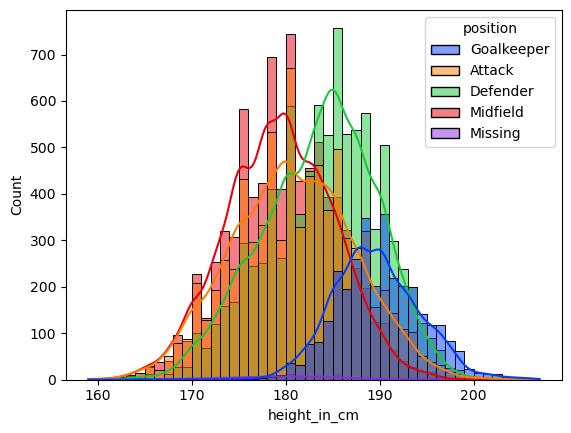

In [190]:
# Overall player height distribution by position
sns.histplot(x='height_in_cm', 
            hue='position',
            data=players,
            palette='bright',
            binwidth=1,
            kde=True)

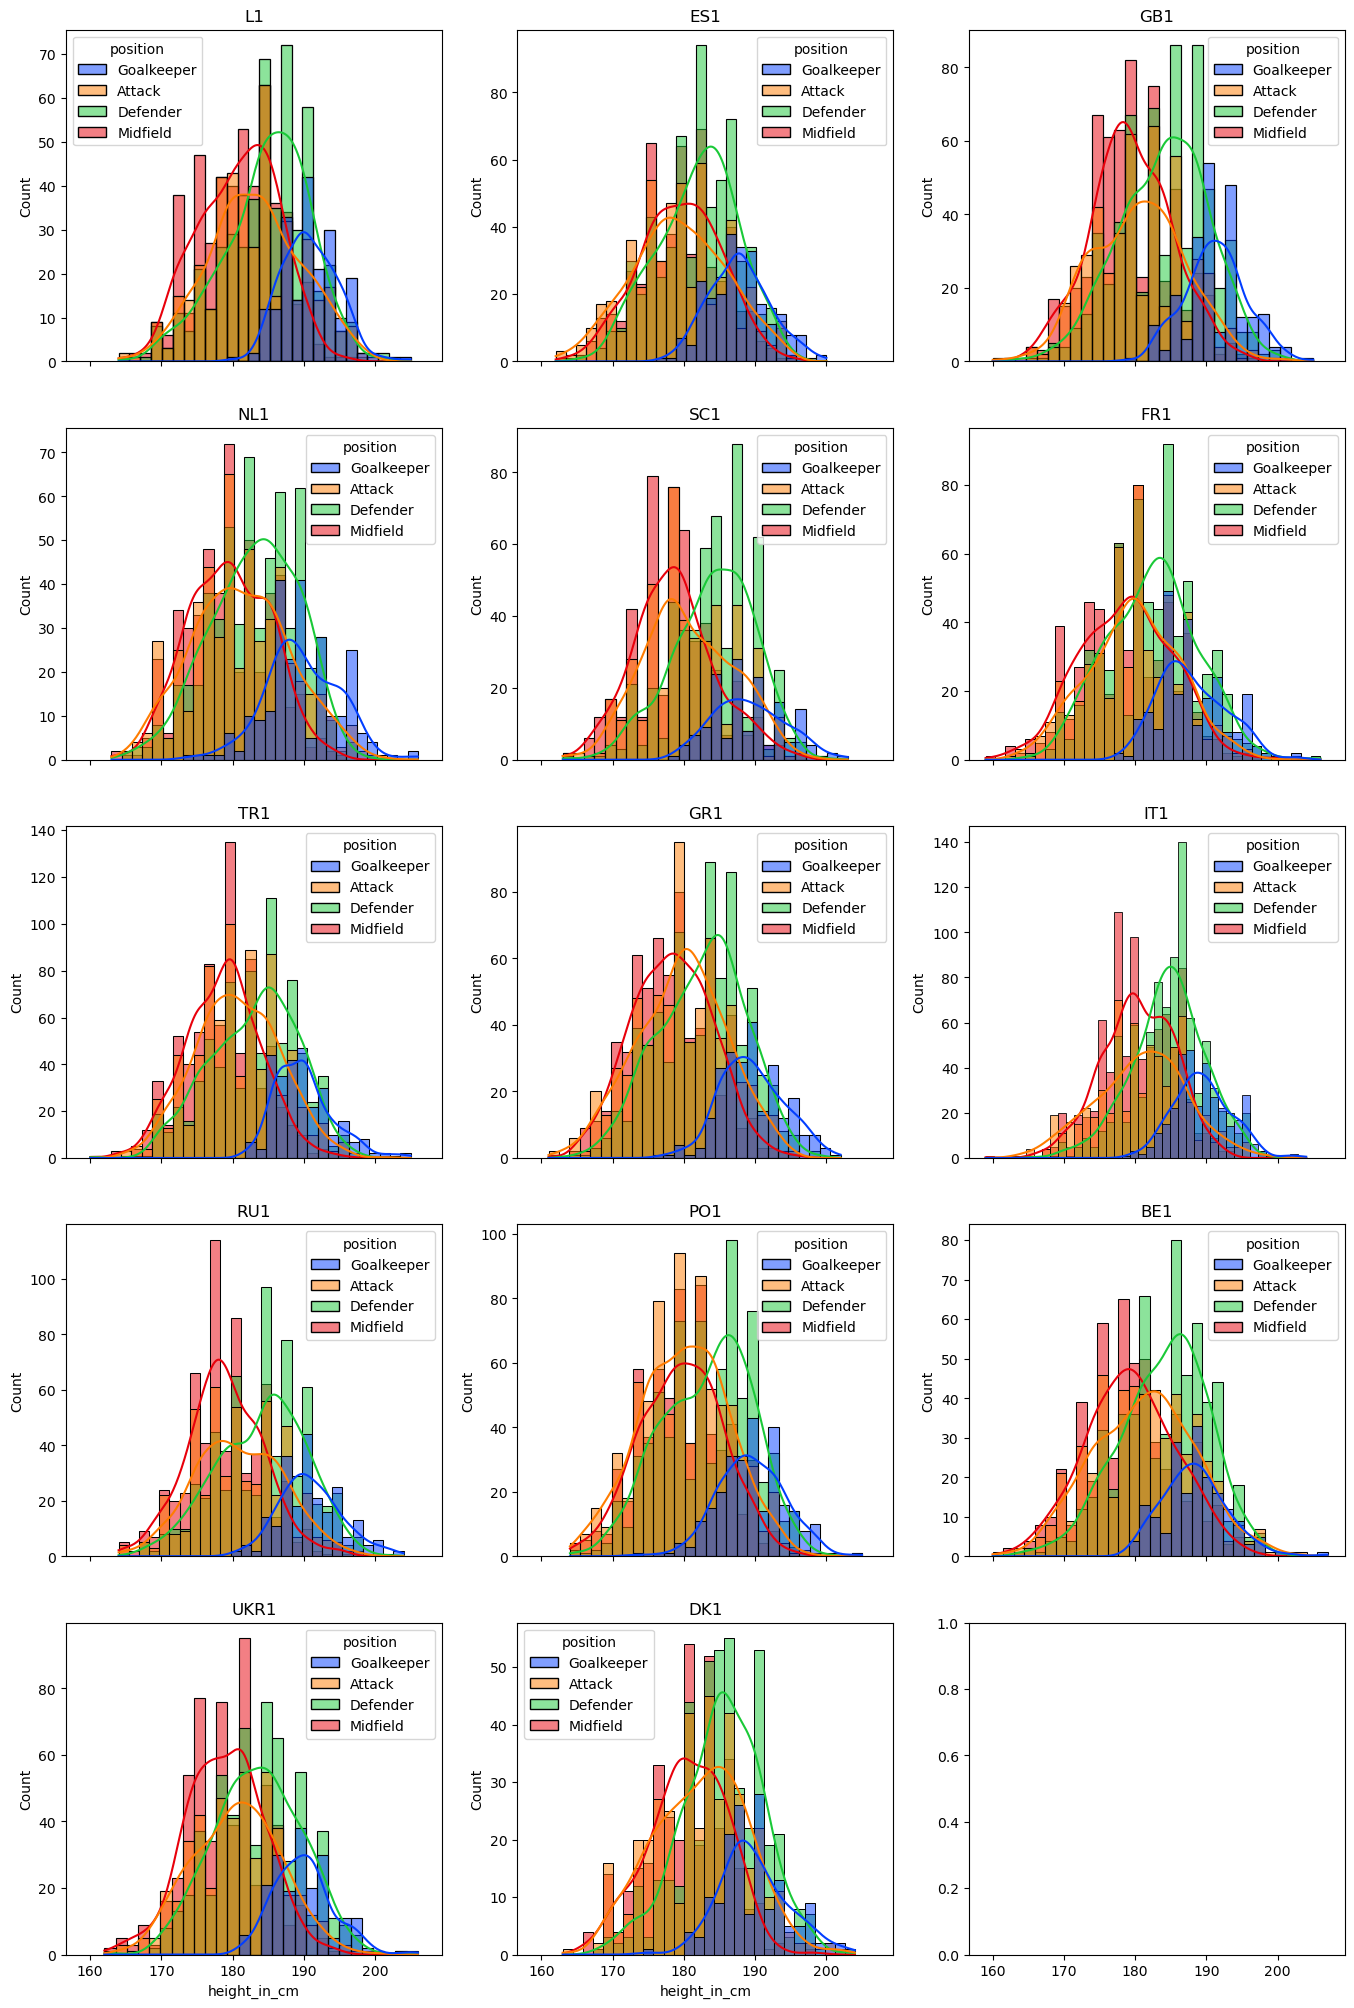

In [219]:
# Player height distribution accross competition and by position
counter = 0
fig, axs = plt.subplots(5, 3, figsize=(16.5,25), sharex=True)
for i in range(5):
    for j in range(3):
        sns.histplot(ax = axs[i,j], x='height_in_cm', palette='bright', kde=True, hue='position', hue_order=['Goalkeeper','Attack','Defender','Midfield'], data=players[players.current_club_domestic_competition_id == players.current_club_domestic_competition_id.unique()[counter]]).set_title(players.current_club_domestic_competition_id.unique()[counter])
        counter += 1
        if counter == 14:
            break

In [192]:
# Count of players per competition
players.current_club_domestic_competition_id.value_counts() 
# Turkey & Italy have had a lot of players (>2900) while Danemark, France, Ukraine & Scotland have had less (<2000)
# This depends on the number of club per competition, team sizes and how long players stay in their clubs
# 14 competitions

TR1     2987
IT1     2985
PO1     2449
GR1     2416
FR1     2120
NL1     2080
GB1     2076
BE1     2067
ES1     2053
RU1     2006
SC1     1881
UKR1    1870
L1      1727
DK1     1585
Name: current_club_domestic_competition_id, dtype: int64

### Market Value

Text(0.5, 1.0, 'More than 5M €')

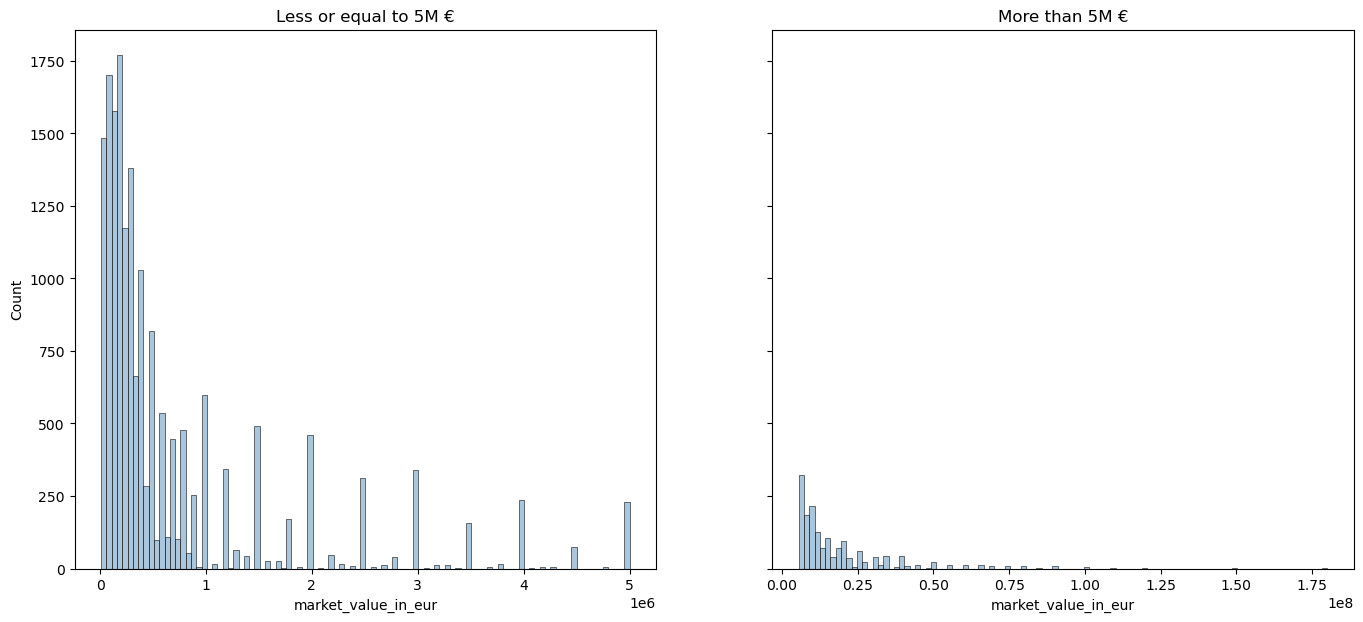

In [259]:
fig, axs = plt.subplots(1, 2, figsize=(16.5,7), sharey=True)
sns.histplot(x='market_value_in_eur', 
            data=players[players.market_value_in_eur <= 5000000],
            palette='bright',
            bins=100,
            ax=axs[0]).set_title('Less or equal to 5M €')

sns.histplot(x='market_value_in_eur', 
            data=players[players.market_value_in_eur > 5000000],
            palette='bright',
            bins=100,
            ax=axs[1]).set_title('More than 5M €')

In [287]:
# Highest Market Value players (>100M)
players[players.market_value_in_eur > 100000000].sort_values('market_value_in_eur', ascending=False)

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name
4606,342229,Kylian,Mbappé,Kylian Mbappé,2023,583,kylian-mbappe,France,Paris,France,...,right,178.0,180000000.0,200000000.0,2024-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/kylian-mbappe/...,FR1,Paris Saint-Germain
12249,418560,Erling,Haaland,Erling Haaland,2023,281,erling-haaland,England,Leeds,Norway,...,left,195.0,180000000.0,180000000.0,2027-06-30 00:00:00,Rafaela Pimenta,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/erling-haaland...,GB1,Manchester City
10293,371998,NaN,Vinicius Junior,Vinicius Junior,2023,418,vinicius-junior,Brazil,São Gonçalo,Brazil,...,right,176.0,150000000.0,150000000.0,NaN,TFM Agency,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/vinicius-junio...,ES1,Real Madrid
23354,581678,Jude,Bellingham,Jude Bellingham,2023,418,jude-bellingham,England,Stourbridge,England,...,right,186.0,150000000.0,150000000.0,2029-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jude-bellingha...,ES1,Real Madrid
28817,433177,Bukayo,Saka,Bukayo Saka,2023,11,bukayo-saka,England,London,England,...,left,178.0,120000000.0,120000000.0,2027-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/bukayo-saka/pr...,GB1,Arsenal FC
29959,401923,Victor,Osimhen,Victor Osimhen,2023,6195,victor-osimhen,Nigeria,Lagos,Nigeria,...,right,186.0,120000000.0,120000000.0,2025-06-30 00:00:00,Roberto Calenda,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/victor-osimhen...,IT1,SSC Napoli
4968,580195,Jamal,Musiala,Jamal Musiala,2023,27,jamal-musiala,Germany,Stuttgart,Germany,...,right,184.0,110000000.0,110000000.0,2026-06-30 00:00:00,11WINS,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jamal-musiala/...,L1,Bayern Munich
12231,406635,Phil,Foden,Phil Foden,2023,281,phil-foden,England,Stockport,England,...,left,171.0,110000000.0,110000000.0,2027-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/phil-foden/pro...,GB1,Manchester City


In [301]:
players['log_MV'] = players['market_value_in_eur'].apply(np.log)
players['log_highMV'] = players['highest_market_value_in_eur'].apply(np.log)

<AxesSubplot:xlabel='log_MV', ylabel='Count'>

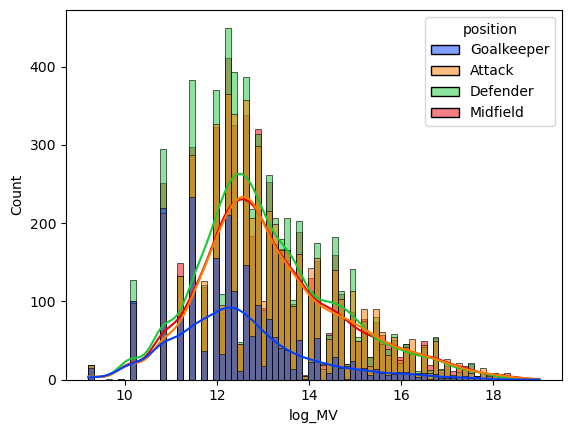

In [297]:
# Overall player log Market Value distribution by position
sns.histplot(x='log_MV', 
             data=players2,
             palette='bright',
             hue='position',
             kde=True,
             hue_order=['Goalkeeper','Attack','Defender','Midfield'])

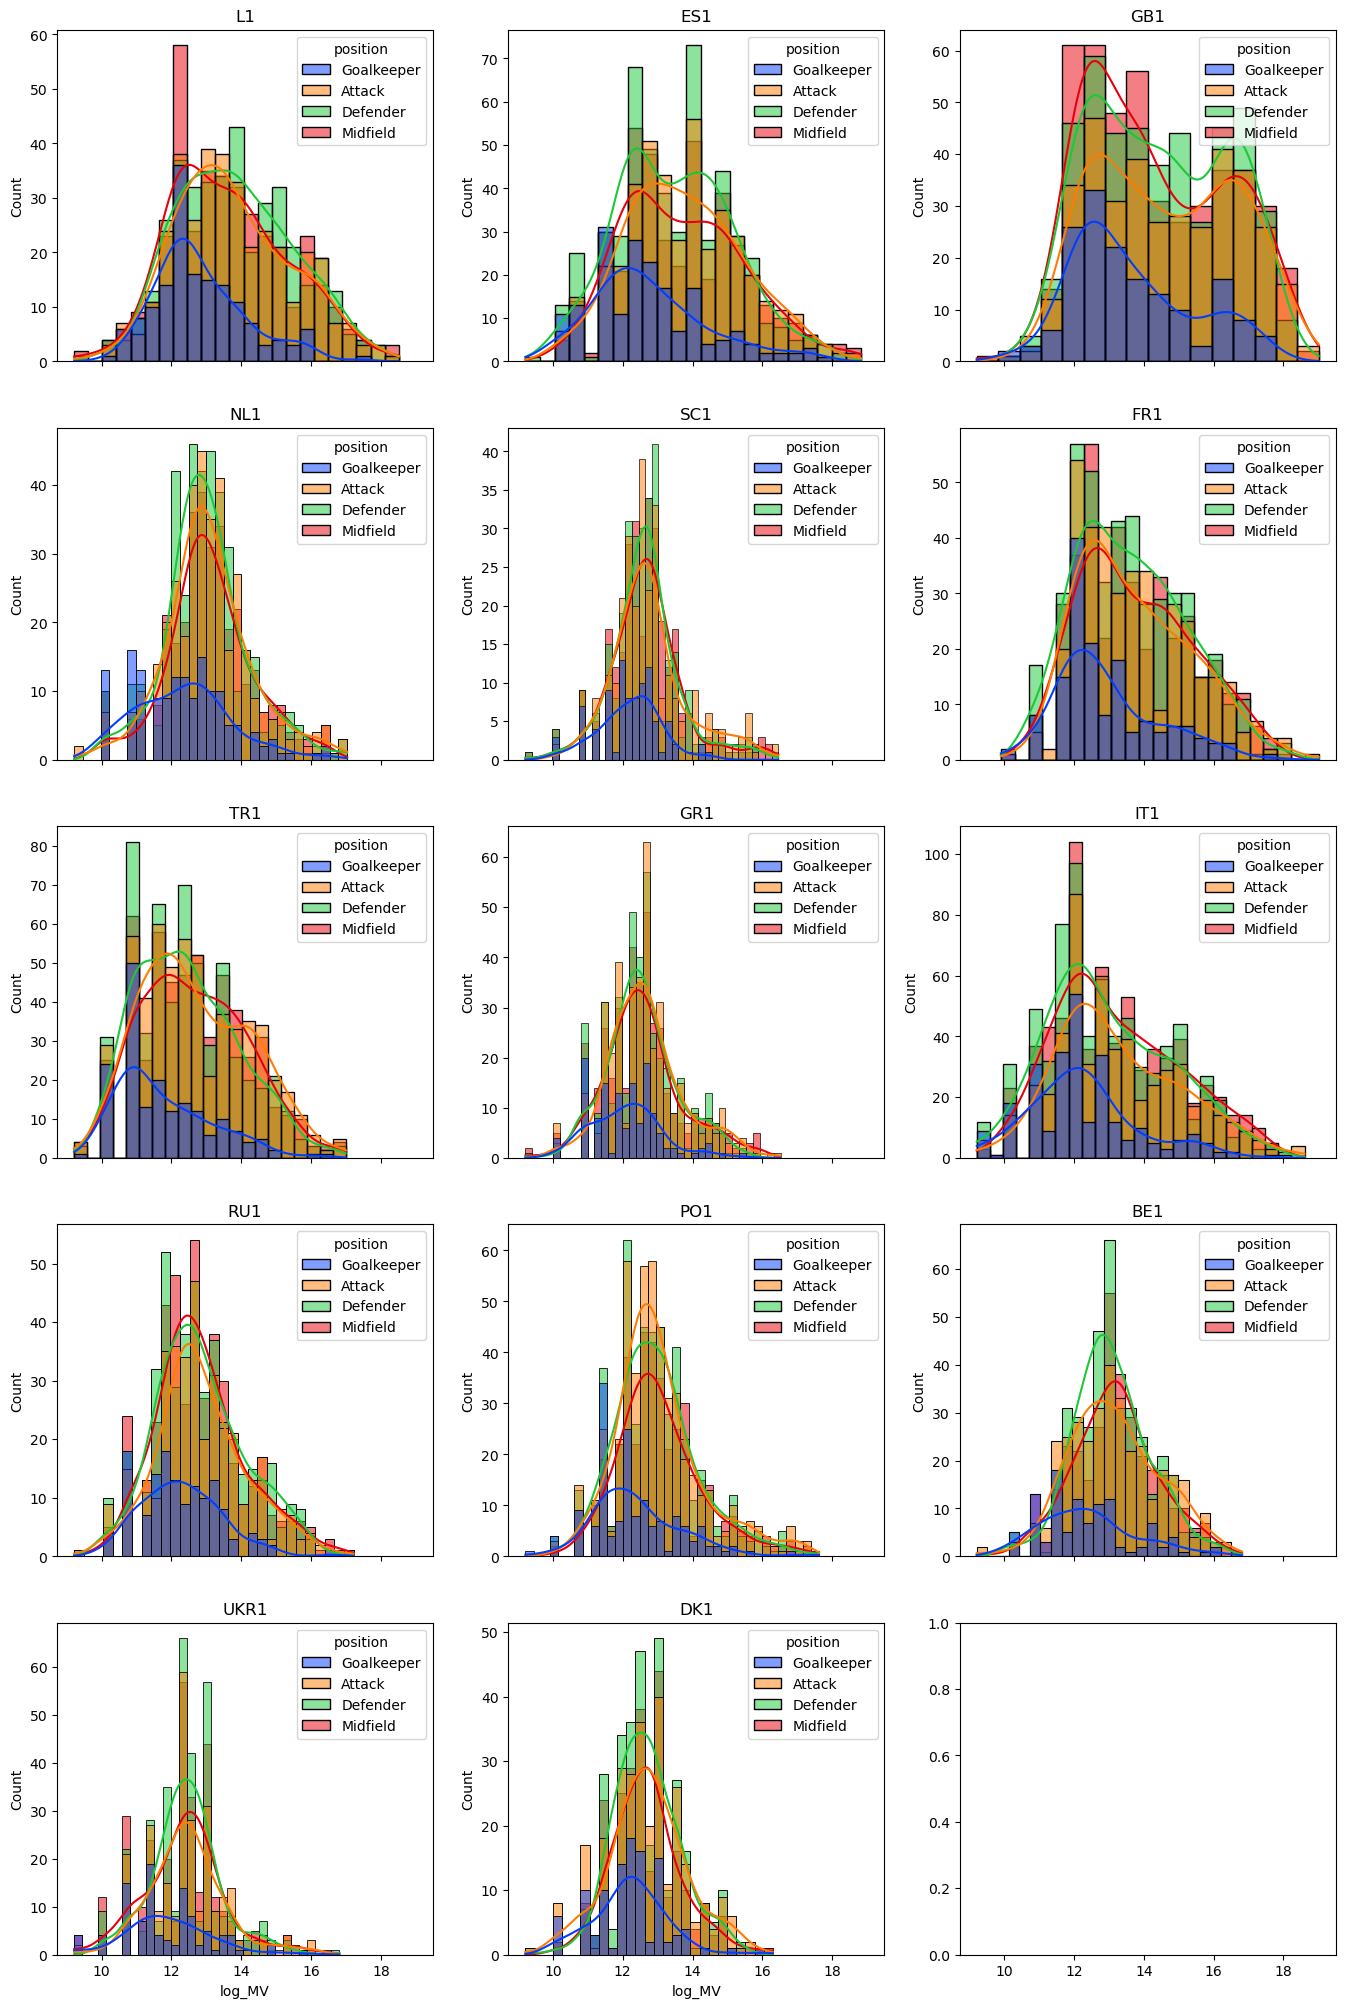

In [293]:
# Player log market value distribution accross competition and position 
counter = 0
fig, axs = plt.subplots(5, 3, figsize=(16.5,25), sharex=True)
for i in range(5):
    for j in range(3):
        sns.histplot(ax = axs[i,j], x='log_MV', palette='bright', kde=True, hue='position', hue_order=['Goalkeeper','Attack','Defender','Midfield'], data=players[players.current_club_domestic_competition_id == players.current_club_domestic_competition_id.unique()[counter]]).set_title(players.current_club_domestic_competition_id.unique()[counter])
        counter += 1
        if counter == 14:
            break

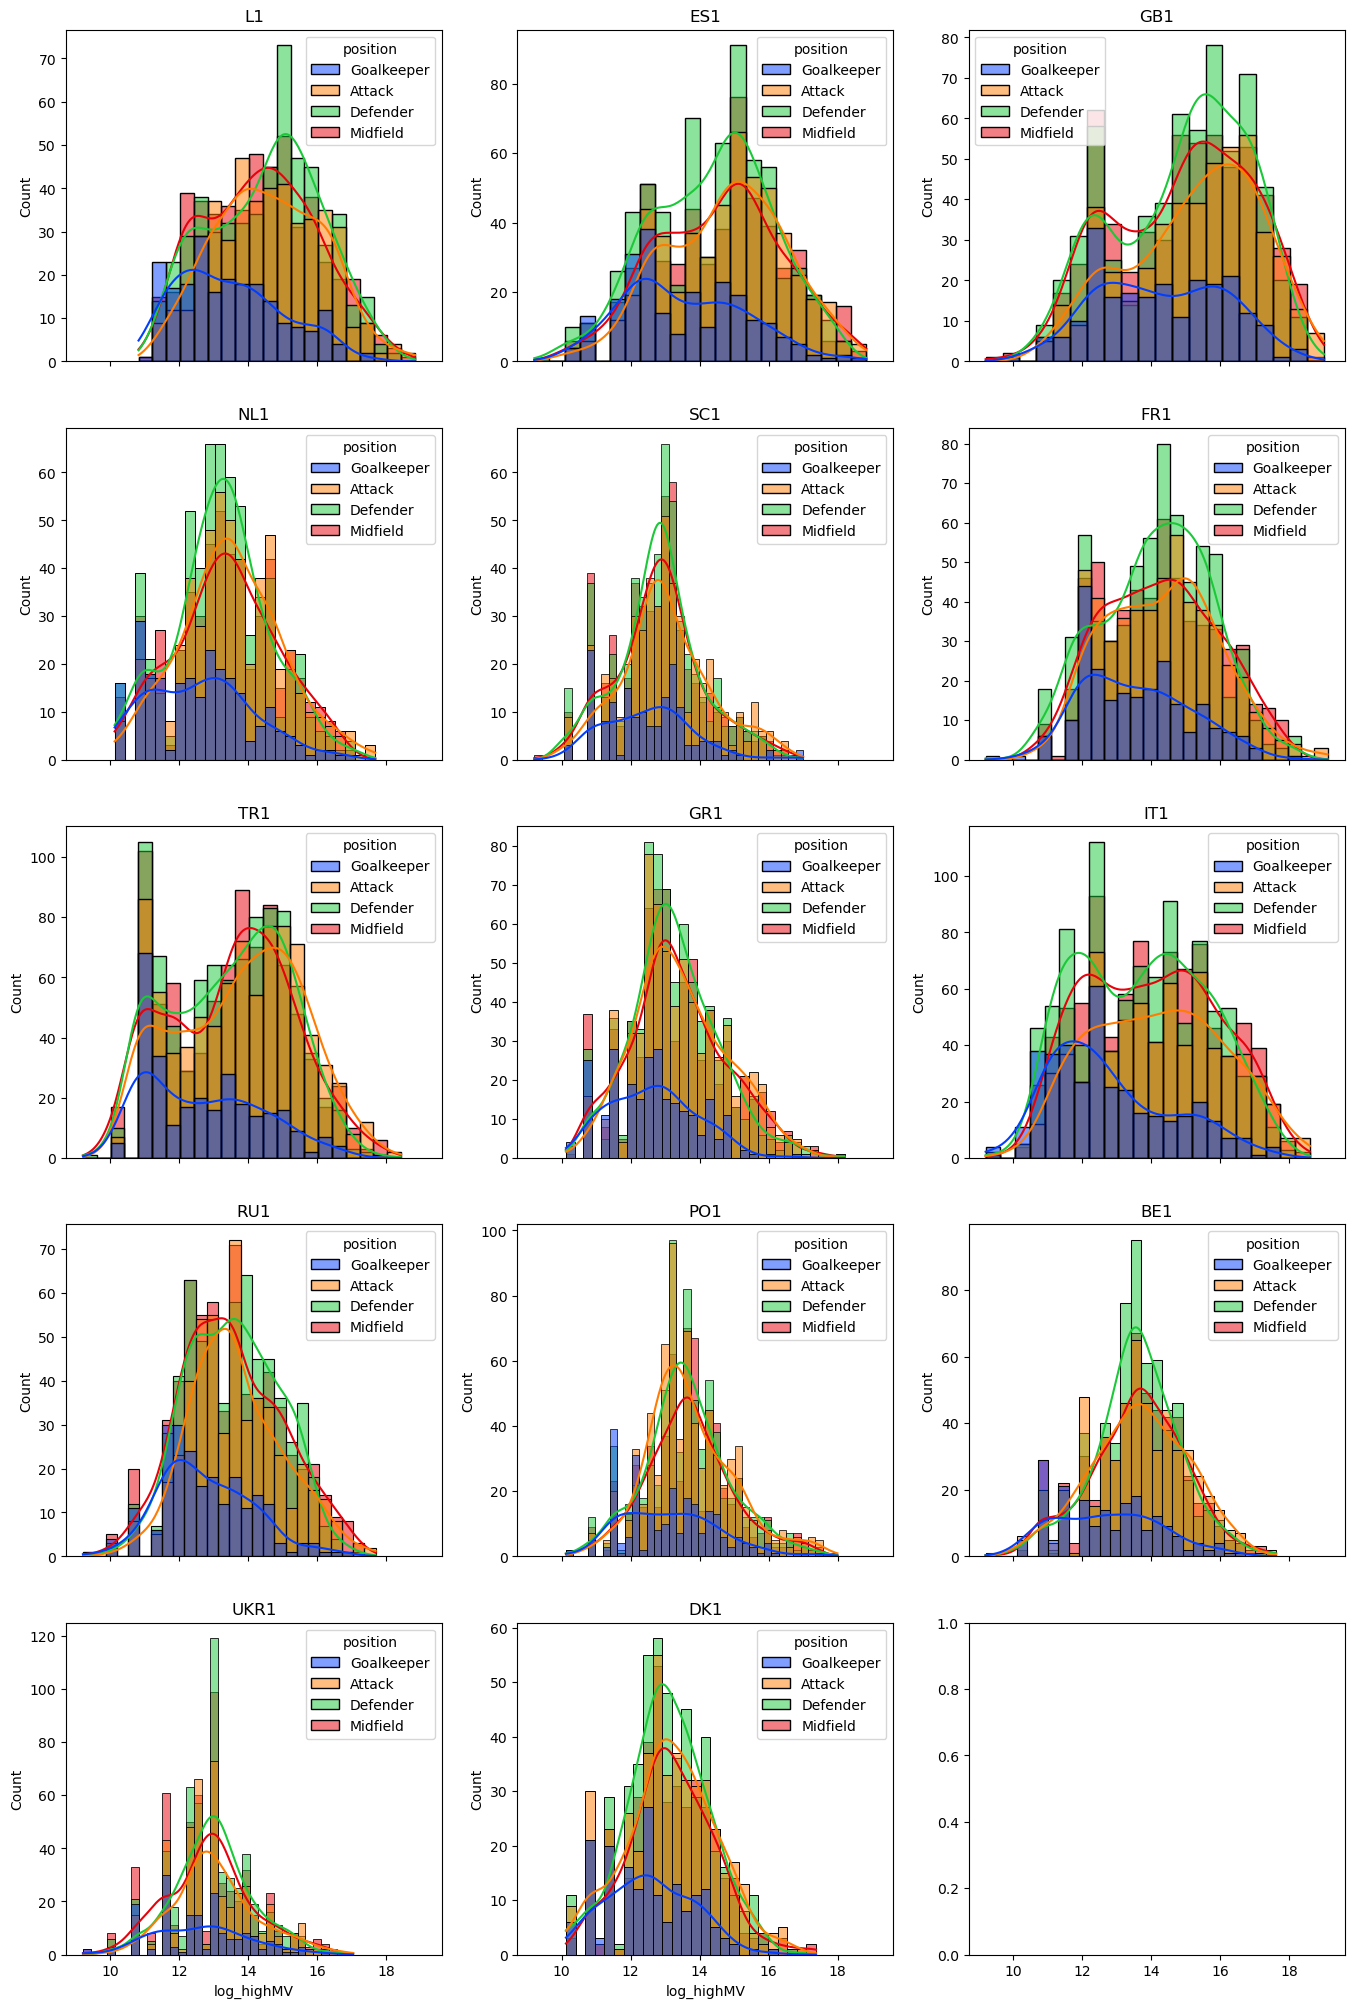

In [302]:
# Player log market value distribution accross competition and position 
counter = 0
fig, axs = plt.subplots(5, 3, figsize=(16.5,25), sharex=True)
for i in range(5):
    for j in range(3):
        sns.histplot(ax = axs[i,j], x='log_highMV', palette='bright', kde=True, hue='position', hue_order=['Goalkeeper','Attack','Defender','Midfield'], data=players[players.current_club_domestic_competition_id == players.current_club_domestic_competition_id.unique()[counter]]).set_title(players.current_club_domestic_competition_id.unique()[counter])
        counter += 1
        if counter == 14:
            break

### Country of birth

In [372]:
players.country_of_birth.value_counts().to_frame()

,country_of_birth
France,2184
Spain,1821
Italy,1771
England,1683
Germany,1527
Turkey,1509
Brazil,1492
Netherlands,1423
Portugal,1035
Greece,969


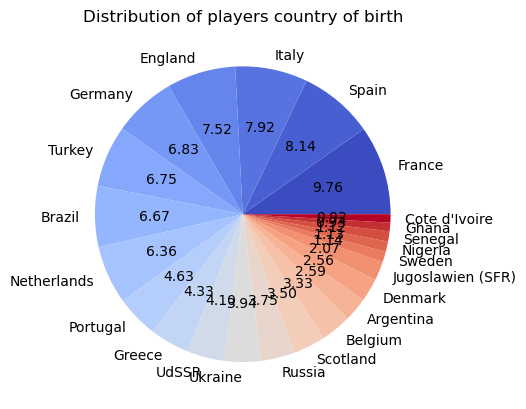

In [376]:
# Distribution of players country of birth
players['country_of_birth'].value_counts()[players['country_of_birth'].value_counts()>200].plot(kind='pie', cmap=cmap, ylabel='', autopct='%.2f').set_title('Distribution of players country of birth');

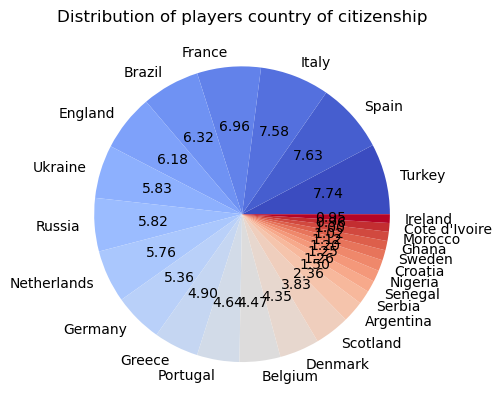

In [377]:
# Distribution of players country of citizenship
players['country_of_citizenship'].value_counts()[players['country_of_citizenship'].value_counts()>200].plot(kind='pie', cmap=cmap, ylabel='', autopct='%.2f').set_title('Distribution of players country of citizenship');

In [422]:
CoB = players.country_of_birth.value_counts().to_frame()
CoC = players.country_of_citizenship.value_counts().to_frame()
CoC = CoC.reindex(cob.index)
Diff_Birth_Citizen = pd.DataFrame(data=(CoB.values - CoC.values), index=cob.index, columns=['Birth - Citizenship']).sort_values('Birth - Citizenship', ascending=False)
Diff_Birth_Citizen

,Birth - Citizenship
France,537.0
Germany,258.0
England,222.0
Netherlands,61.0
Switzerland,28.0
Argentina,21.0
Réunion,17.0
Spain,17.0
Guinea-Bissau,9.0
Monaco,5.0


### Retirement -- WIP

In [ ]:
players_retired = players[players.last_season <= 2022].copy()
players_retired['last_season'] = pd.to_datetime(players['last_season'], format='%Y')
players_retired['age_of retirement'] = (players_retired['last_season'] + datetime.timedelta(days=364) - players_retired['date_of_birth']).dt.days/365
players_retired['age_of retirement'].describe()

In [514]:
players.columns

Index(['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'image_url', 'url', 'current_club_domestic_competition_id',
       'current_club_name', 'log_MV', 'log_highMV'],
      dtype='object')